# Dominik Strzałko - Zadanie 6 - Problem nadmiernego dopasowania

# 0. Importy, wczytanie zbioru danych i podział.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('data6.tsv',sep="\t", names=['x','y'])

X = df.x
X = X.to_numpy()
X = X.reshape(-1,1)

y = df.y
y.to_numpy()

array([-555.64 , 3840.141, 2274.989, 1146.575, 1840.589, 1663.894,
       3504.537, 3708.239, -358.24 , 2444.162, 3348.941,  271.623,
        900.423,   77.543, 3313.424, 2525.653,  734.413, 4067.41 ,
       2182.147,  490.714])

In [3]:
X_seq = np.linspace(X.min(),X.max(),400).reshape(-1,1)

# 1. Stworzenie Wykresów do zadania.

### **1.1.** Regresja wielomianowa 1,2 i 5 stopnia na 1 wykresie

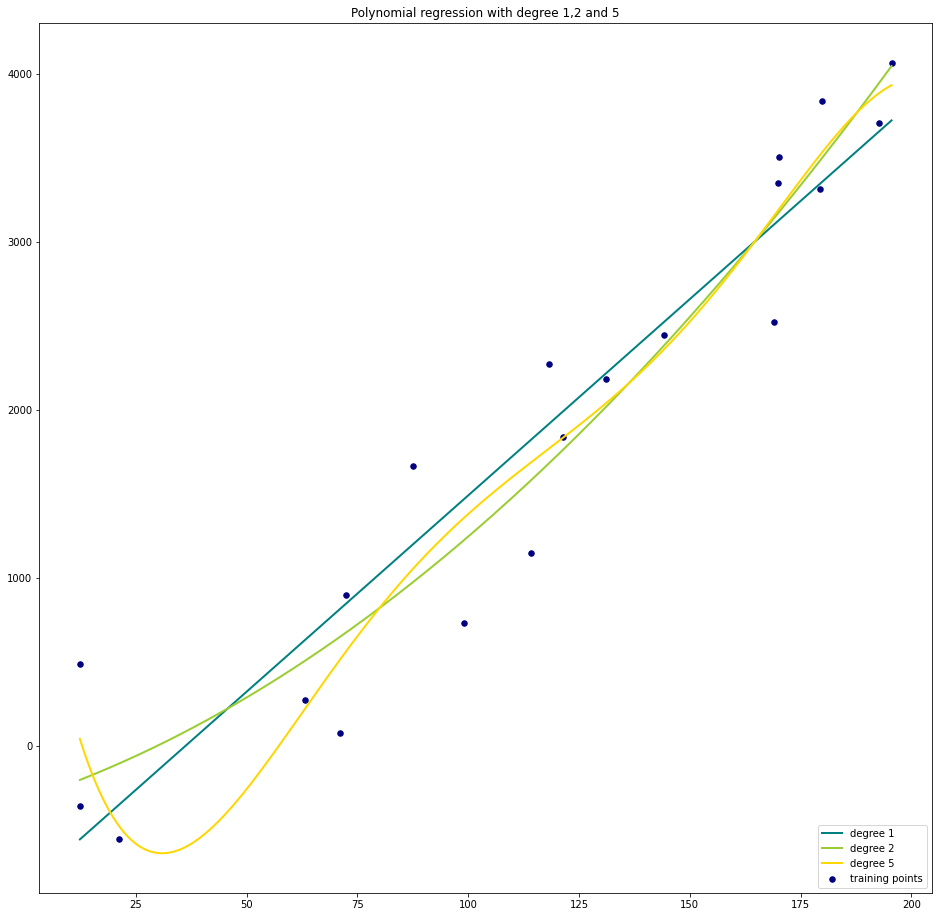

In [4]:
plt.figure(figsize=(16,16))
plt.title("Polynomial regression with degree 1,2 and 5")
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
for count, degree in enumerate([1, 2, 5]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X_seq)

    plt.plot(X_seq, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower right')

plt.show()

### **1.2.** Regresja wielomianowa 5 stopnia (z wykorzystaniem LinearRegression())


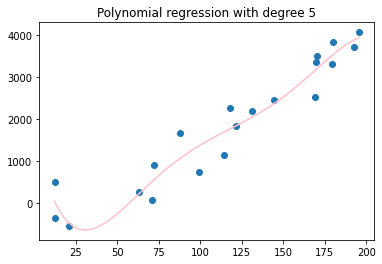

In [5]:
polyreg=make_pipeline(PolynomialFeatures(degree=5),LinearRegression())
polyreg.fit(X,y)

scores = cross_val_score(polyreg, X, y, scoring="neg_mean_squared_error", cv=10)

plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="Pink")
plt.title("Polynomial regression with degree 5")
plt.show()

### **1.3.** Regresja wielomianowa 5 stopnia (z wykorzystaniem Ridge(alpha=10) Regularyzacja)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.83361e-23): result may not be accurate.
  overwrite_a=True).T


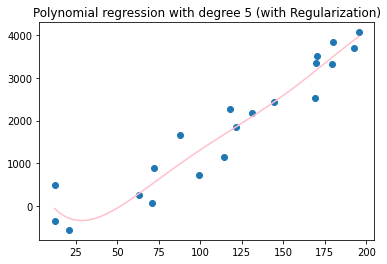

In [6]:
polyreg_alpha = make_pipeline(PolynomialFeatures(degree=5),Ridge(alpha=10, fit_intercept=True))
polyreg_alpha.fit(X,y)

plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg_alpha.predict(X_seq),color="pink")
plt.title("Polynomial regression with degree 5 (with Regularization)")
plt.show()

#### Na oko jest lepiej, ale pierwotny wykres również wyglądał całkiem dobrze.

### **1.4.** Porównanie wersji z regularyzacją i bez na 1 wykresie

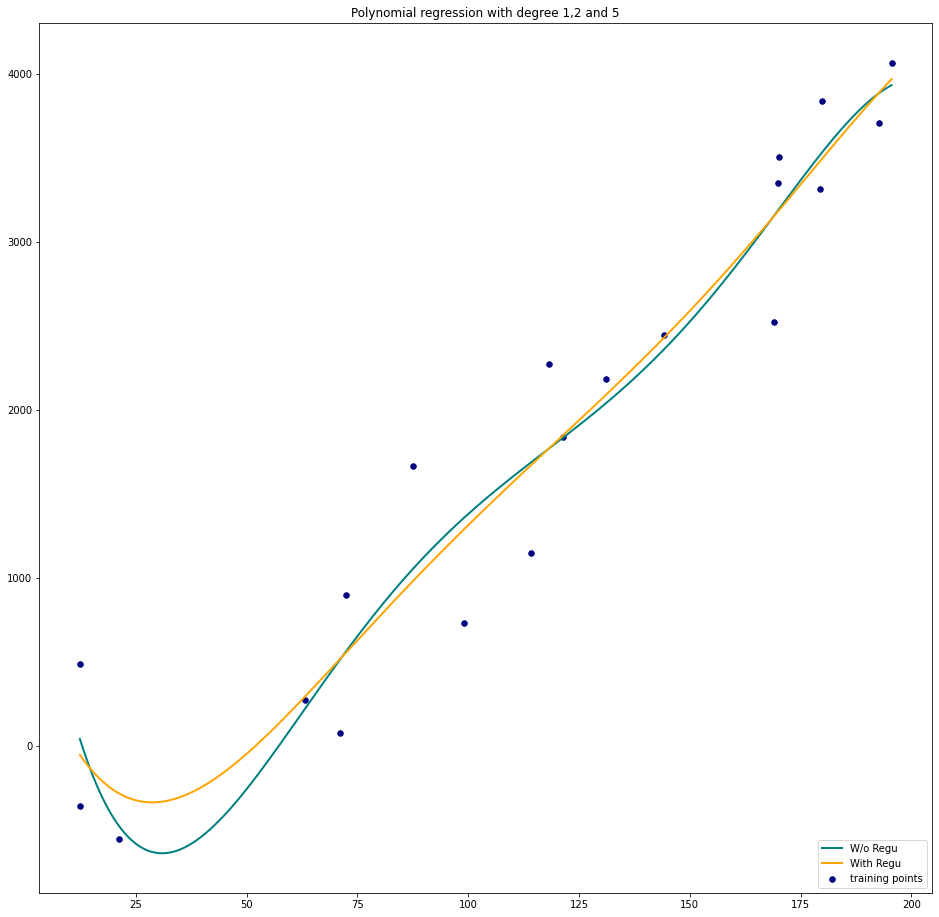

In [7]:
plt.figure(figsize=(16,16))
plt.title("Polynomial regression with degree 1,2 and 5")
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")

plt.plot(X_seq, polyreg.predict(X_seq), color='Teal', linewidth=lw, label="W/o Regu")
plt.plot(X_seq, polyreg_alpha.predict(X_seq), color='orange', linewidth=lw, label="With Regu")

plt.legend(loc='lower right')

plt.show()

### **1.5.** Bonus - StandardScaler()

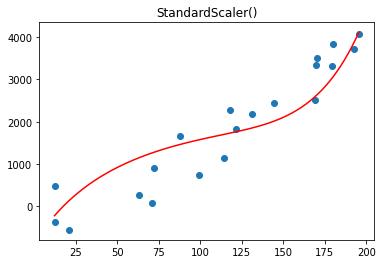

In [8]:
polyreg_alpha = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Ridge(alpha=10, fit_intercept=True))
polyreg_alpha.fit(X,y)

plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg_alpha.predict(X_seq),color="Red")
plt.title("StandardScaler()")
plt.show()

# Bonus. Przydatne źródła:

1. **Underfitting vs. Overfitting**: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

2. **cross_val_score**: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

3. **Polynomial interpolation**: https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

4. **PolynomialFeatures**: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

